In [7]:
import os
os.getcwd()


'C:\\Users\\PC'

In [8]:
import pandas as pd
import numpy as np 


In [15]:
class Info(): 
    def __init__(self,data):
        self.data = pd.read_csv("hmelq.csv")
        data=self.data
        print(data.head())
        print(data.info())
        print(data.describe().T)
        print(data.shape)
        print(data.columns)


In [13]:
data = pd.read_csv("hmelq.csv")

In [16]:
# Data hakkında ki bilgiler gözlendi.
Info(data)

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   obje

In [111]:
# Nan degeri sayısı.
data.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [114]:
#Çoğunluk sınıfı kullanarak değiştirme 
data["reason"].fillna(value = "DebtCon",inplace = True)
data["job"].fillna(value = "Other",inplace = True)

data["derog"].fillna(value=0,inplace=True)
data["delinq"].fillna(value=0,inplace=True)

#Her sınıfın ortalamasını kullanarak değiştirme
data.fillna(value=data.mean(),inplace=True)

In [115]:
#eksik olan tüm değerler doldurulur
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [118]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327


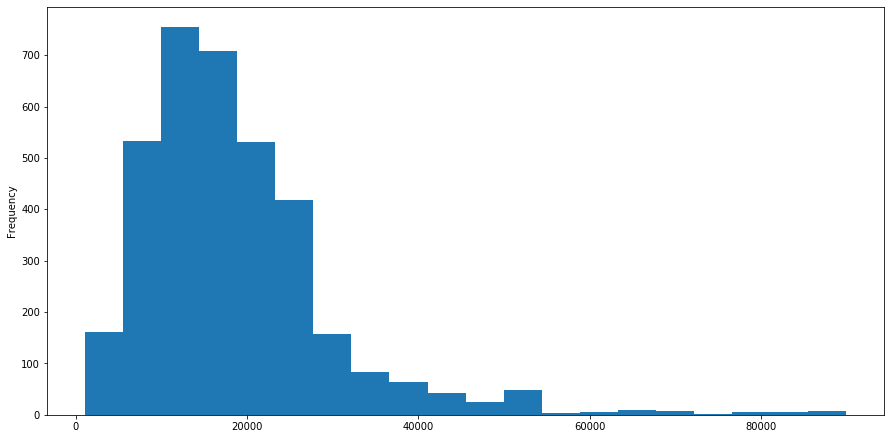

In [124]:
data["loan"].plot.hist(bins = 20,figsize=(15,7.5))

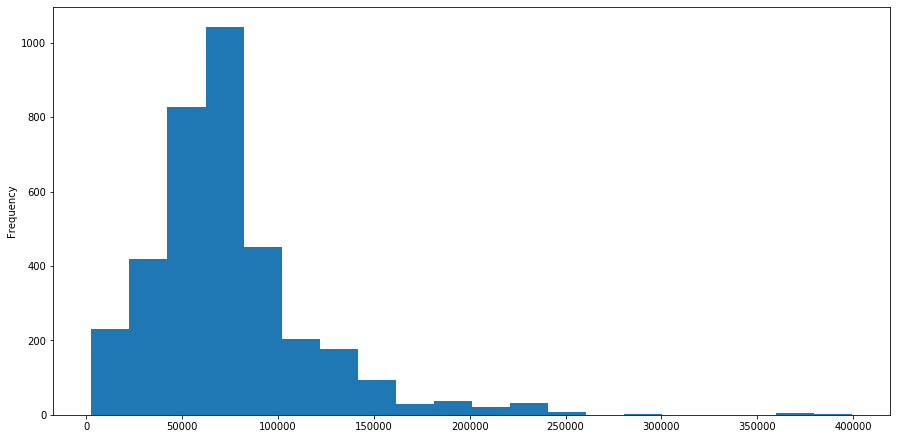

In [126]:
data["mortdue"].plot.hist(bins = 20,figsize=(15,7.5))

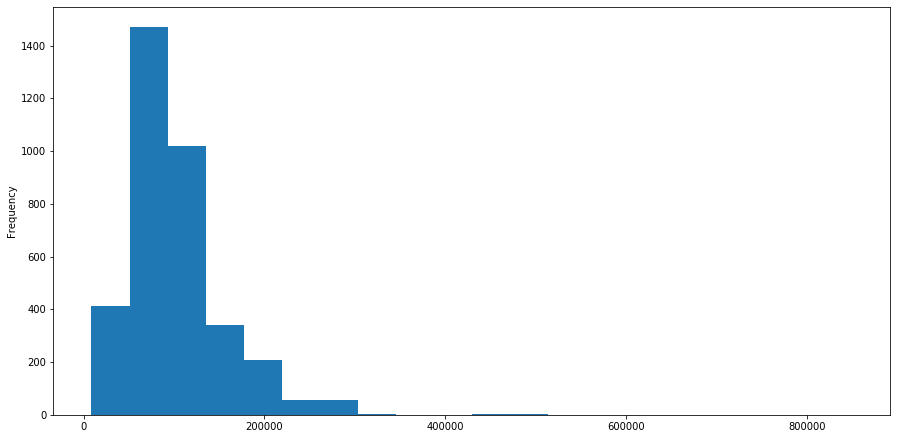

In [127]:
data["value"].plot.hist(bins = 20,figsize=(15,7.5))

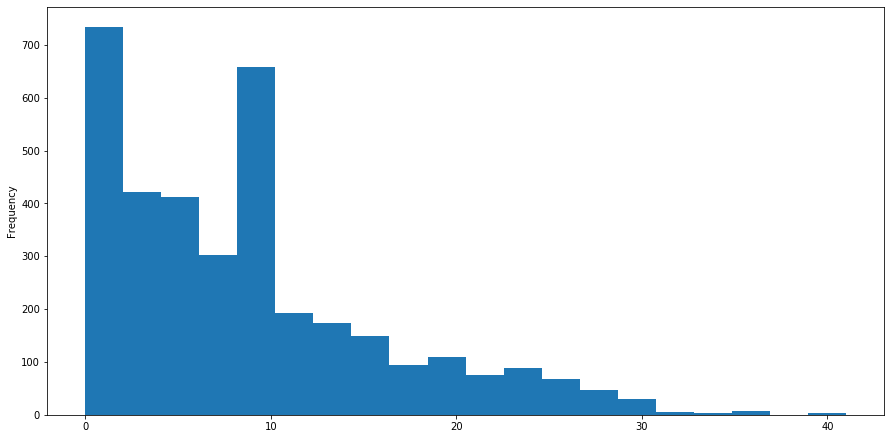

In [128]:
data["yoj"].plot.hist(bins = 20,figsize=(15,7.5))

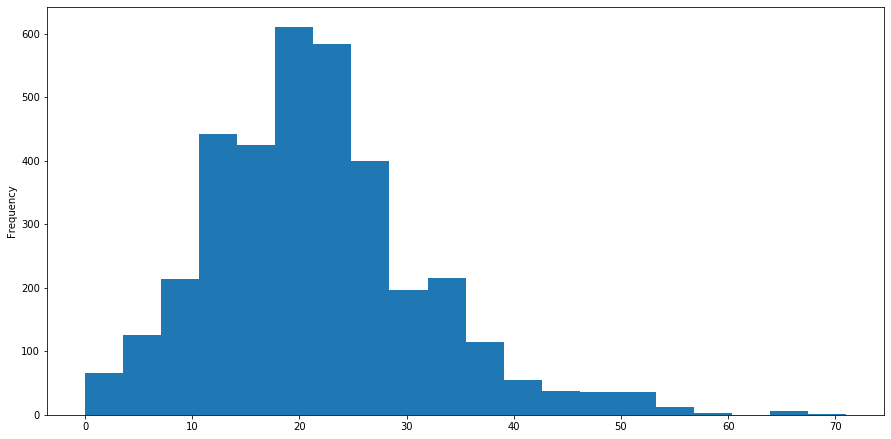

In [129]:
data["clno"].plot.hist(bins = 20,figsize=(15,7.5))

In [136]:
#Borcunu ödeyenler ve ödemeyenlerin dagılımı
y = data.bad
y = y.astype(object) 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
bad,,
0,2863,0.800615
1,713,0.199385


In [137]:
#Kategorik verilerin analiz edilmesi
categorical_cols = [cname for cname in data.columns if
                    data[cname].dtype in ['object']]
cat = data[categorical_cols]
cat.columns

Index(['reason', 'job'], dtype='object')

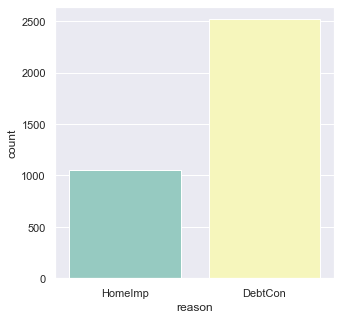

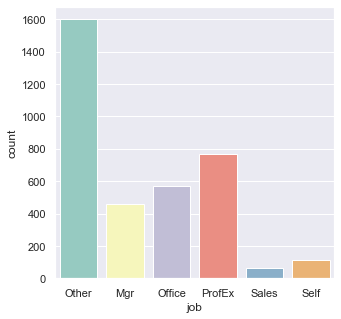

In [140]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['reason','job']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat[col], data=cat, palette="Set3")
    plt.show()

In [20]:
# One-hot encode işlemi.
Encod_data = pd.get_dummies(data)
print(Encod_data)

      bad   loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0       0  81200   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1       0  12600  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2       0  18000   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3       0  10300   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4       0   9400   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   
...   ...    ...       ...       ...   ...    ...     ...     ...   ...   ...   
3571    1   8400   31800.0   72000.0   NaN    0.0     2.0  187.27   1.0  21.0   
3572    1  21600  154991.0       NaN   NaN    2.0     4.0  165.60   0.0  43.0   
3573    1  24000   35000.0       NaN   3.0    1.0     0.0  177.50   0.0  16.0   
3574    1  10000       NaN   25010.0   5.0    0.0     3.0  326.13   4.0  17.0   
3575    1   5900       NaN   28000.0   1.0    2.0     1.0   36.77   1.0   8.0   

      debtinc  reason_DebtC

In [142]:
# Sayısal verilerin görselleştirilmesi
numerical_cols = [cname for cname in data.columns if
                 data[cname].dtype in ['float']]
num = data[numerical_cols]
num.columns

Index(['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno',
       'debtinc'],
      dtype='object')

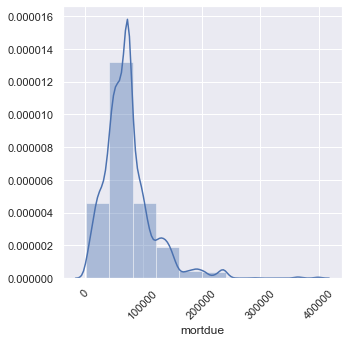

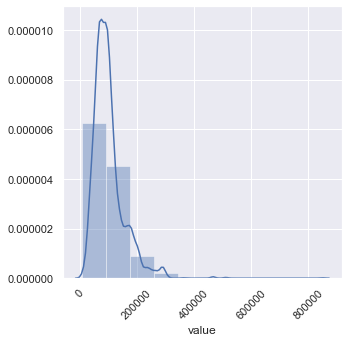

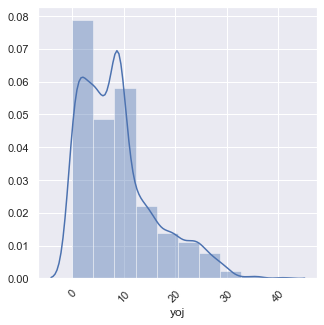

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

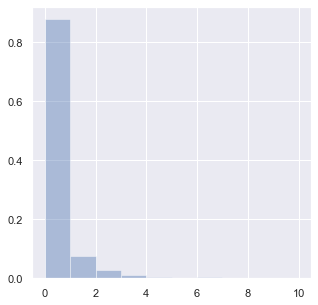

In [143]:
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno',
       'debtinc']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()

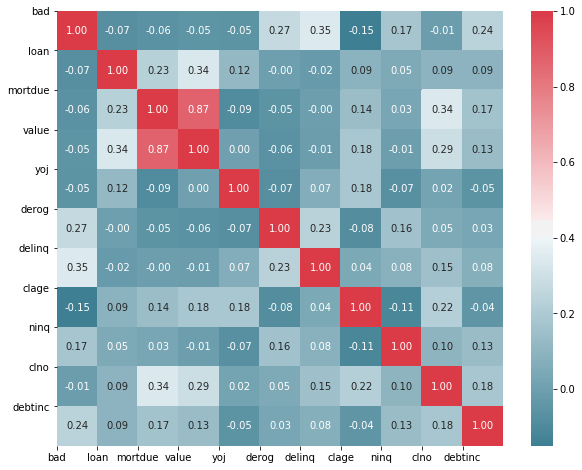

In [19]:
# Korelasyon matrisi ile degişkenler arsaında ki ilişki gözlemlendi.
import matplotlib.pyplot as plt
import seaborn as sns 
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()